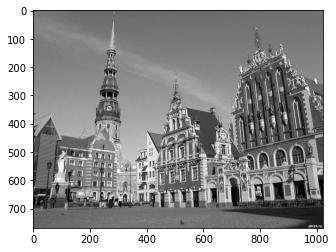

In [1]:
# all in all - how to recognize images
# https://www.learnopencv.com/image-recognition-and-object-detection-part1/

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('datasets/images/riga.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

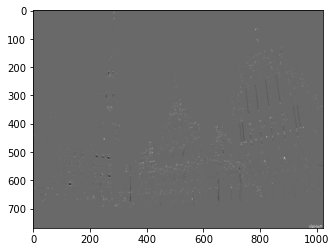

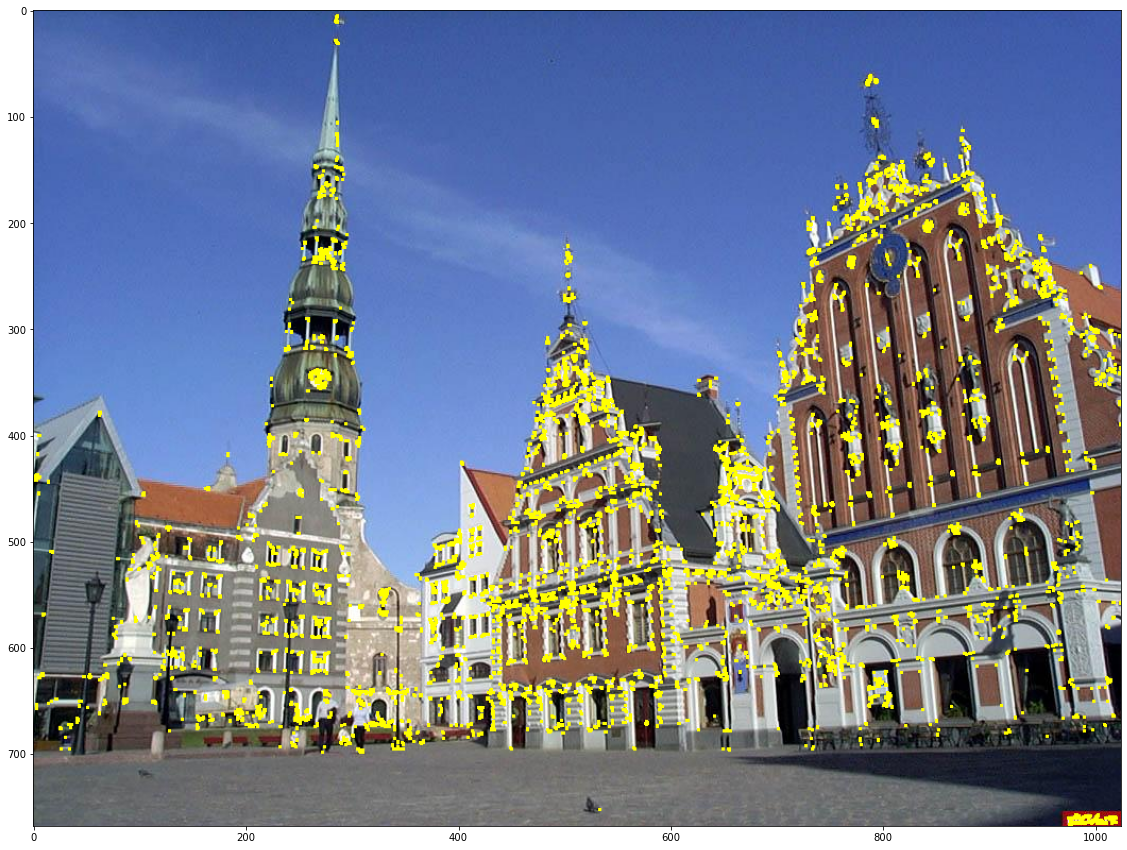

In [2]:
# Harris corner detection
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
fgray = np.float32(gray)
# size [of neighbourhood], aperture for derivative, Harris free parameter to tune - bigger - less points detected
dst = cv2.cornerHarris(fgray, 2, 3, 0.1)
# result is dilated (propagated around) for marking the corners
dst = cv2.dilate(dst, None)
# this is the map of "how probable this is the corner"
plt.imshow(dst, cmap="gray", vmin=dst.min(), vmax=dst.max())
plt.show()

# Threshold for an optimal value, it may vary depending on the image.
img_copy = img.copy()
img_copy[dst > 0.01 * dst.max()] = [255, 255, 0]

plt.figure(figsize=(20,15))
plt.imshow(img_copy)
plt.show()

Keypoints number: 7283
Keypoint
  angle: 194.7906494140625
  pyramid layer: 10420735
  strength: 0.043316278606653214
  neighborhood diameter: 2.0735106468200684
  pos: (2.611015558242798, 658.176025390625)


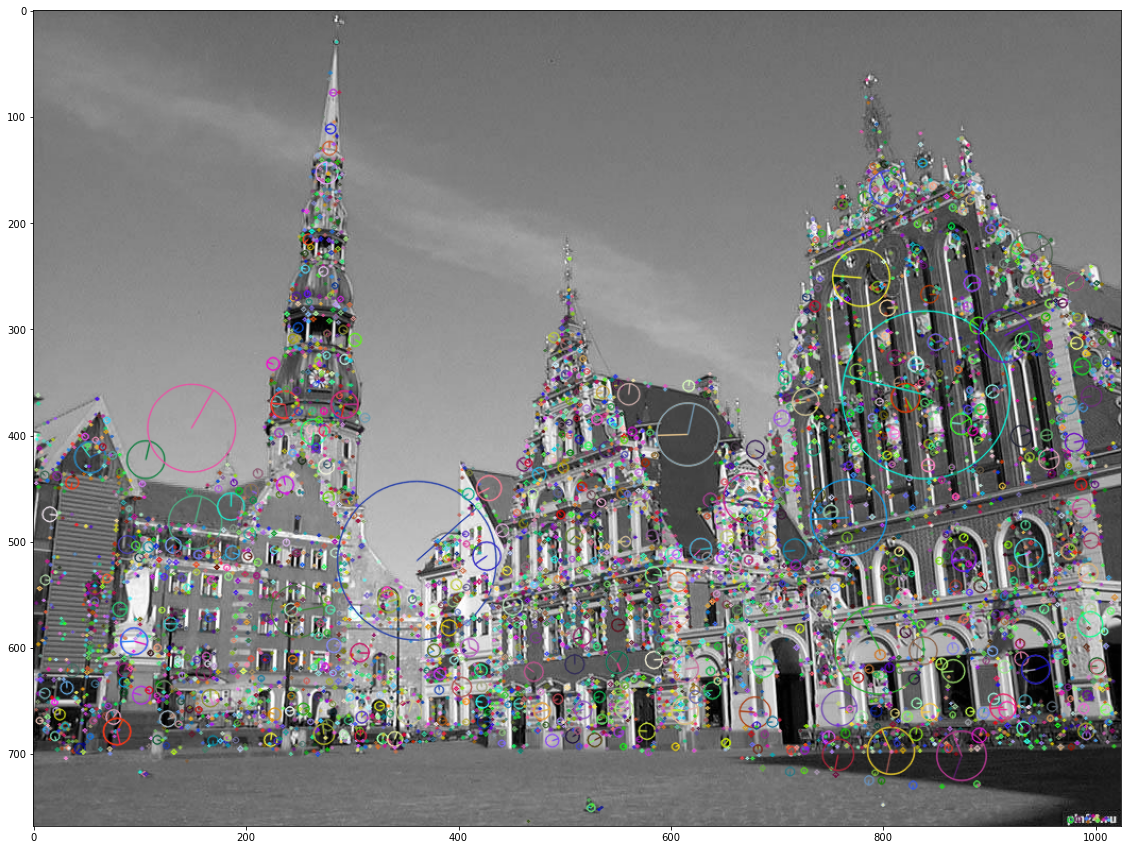

[  0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.
   0.   0.   5.   4.   2.   1.   1.   1.   0.   0.   3.  23.  26.   4.
   1.   1.   1.   1.   0.   0.   0.   0.   0.  12.  24.   0.  28.  25.
   2.   0.   0.  15.  46.   5. 148.  43.   3.   3.   6.  32.  29.  33.
  83.  32.  26.   6.   8.  61.  67.  82.   0.   0.   0.   3.   4.  30.
 148.  10.  17.   3.   1.   6.  17.  79. 148.  16. 148.  20.   0.   0.
  11.  38.  61.  59. 140.   6.   0.   0.   0.  30. 148. 135.   0.   0.
  11.  68.  22.  22.  53.   1.   1.   0.   7.  40.  41.  31.  22.   1.
 148.  31.   0.   2.  28.  25.   5.   9. 148.  31.   3.   1.   0.   0.
   7.  22.]


In [3]:
# SIFT: scale-invariant feature transform
# Uses difference of gaussians to compute gradients
# builds histogram of 36 10-degree bins
# uses maximums to find orientation
# https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html
# This algorithm is patented, so:
# pip install opencv-contrib-python

# GOOD TEXT: http://aishack.in/tutorials/sift-scale-invariant-feature-transform-features/

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)
print("Keypoints number:", len(kp))
img2 = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
k = kp[1]
print("Keypoint\n  angle: {}\n  pyramid layer: {}\n  strength: {}\n  neighborhood diameter: {}\n  pos: {}".format(
    k.angle, k.octave, k.response, k.size, k.pt
))

plt.figure(figsize=(20,15))
plt.imshow(img2)
plt.show()

kp, descriptors = sift.detectAndCompute(gray, None)
k_des = descriptors[0, :]
print (k_des)

In [4]:
# SURF 
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html

In [5]:
# HOG
# HOG is based on the idea that local object appearance can be effectively described by the distribution ( histogram ) 
# of edge directions ( oriented gradients ).